In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('seaborn-colorblind')

# Reading edgelist from file

In [2]:
# read all network edgelist from file
def read_edge(net_name):
    path = '/home/hermuba/data0118/network1122/'
    filename = path + net_name + '_lls_rm_plasmid_edgelist'
    
    # skip first line header!!
    with open(filename, 'rb') as f:
      
        net = nx.read_edgelist(f, nodetype = str, comments = '#')
    return(net)

string = read_edge('string')
refseq = read_edge('refseq')
eskape = read_edge('eskape')
domain = read_edge('domain')

In [3]:
# read baysean integrated combined network
with open('/home/hermuba/data0118/network1122/combined_rm_plasmid_baye', 'rb') as f:
    
    combined = nx.read_edgelist(f, nodetype = str, comments = '#', delimiter = ',',  data=(('combined_lls',float),))

# Reading annotation from File

In [4]:
# read annotation file
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno_df')

# Calculate network statistics

In [5]:
# calculate how many nodes, annotation in each network
# network stats comparing them
core_genes = gold_anno.loc[gold_anno['core'] == True]
def net_stat(G):
    # core
    number_of_core = len(set(G.nodes()).intersection(gold_anno.loc[gold_anno['core'] == True].index))
    # accessory
    number_of_acc = G.number_of_nodes() - number_of_core
    # hypothetical
    number_of_hypo = len(set(G.nodes()).intersection(gold_anno.loc[gold_anno['hypo_nr'] == True].index))
    # mobile
    number_of_mobile = len(set(G.nodes()).intersection(gold_anno.loc[gold_anno['is_aclame'] == True].index))
    # CARD genes
    number_of_card = len(set(G.nodes()).intersection(gold_anno.loc[gold_anno['is_card'] == True].index))
    # COG annotation
    number_of_cog = len(set(G.nodes()).intersection(gold_anno.loc[gold_anno['cog_ID'].notna()].index))
    return([G.number_of_nodes(), 
            G.number_of_edges(), 
            nx.algorithms.components.number_connected_components(G),
           number_of_core,
           number_of_acc,
           number_of_hypo,
           number_of_mobile,
           number_of_card,
           number_of_cog])

# run
df = pd.DataFrame(columns = ['No. nodes', 'No. edges', 'No. components', 'No. core', 'No. accessory', 'No. hypothetical','No. Aclame', 'No. CARD', 'No. COG'], index = ['RefseqNet', 'EskapeNet', 'StringNet','DomainNet', 'pangenomeNet'])
i = 0
for net in [refseq, eskape, string, domain, combined]:
    
    df.iloc[i] = net_stat(net)
    i+=1

# save to file
df.to_csv('/home/hermuba/data0118/fig/netstat.csv')

In [6]:
df

,No. nodes,No. edges,No. components,No. core,No. accessory,No. hypothetical,No. Aclame,No. CARD,No. COG
RefseqNet,16141,383806,2830,1616,14525,8757,8086,35,5053
EskapeNet,3797,305944,183,1431,2366,512,2744,24,3006
StringNet,1977,6288,223,1404,573,147,843,10,1456
DomainNet,18601,2070951,628,3342,15259,4628,12371,99,12399
pangenomeNet,25984,2730175,1219,3383,22601,10761,14776,101,12523


In [7]:
# size v.s. number of components


plt.savefig('/home/hermuba/data0118/fig/combined_component_size.pdf', format = 'pdf', dpi = 300, pad_inches = 1, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

most connected node degree  3987


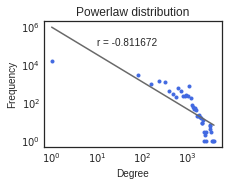

In [24]:
# plot powerlaw for just pan-genome net
from network_analysis.net_arch import *
mpl.style.use("seaborn-white")
net = combined
logx, logy, line, slope, r_value, p_value = power_law(net)
plt.figure(figsize = (3.2,2.3))
plt.plot(logx, logy, '.', color = 'royalblue')
plt.plot(logx, line, color = 'dimgrey' )
plt.text(1, 5,'r = '+ '{:f}'.format(r_value))
plt.title('Powerlaw distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(list(range(4)), ['$10^{}$'.format(i) for i in range(4)])
plt.yticks(list(range(0,8, 2)), ['$10^{}$'.format(i) for i in range(0,8,2)])
plt.savefig('/home/hermuba/data0118/fig/fig_5_1_pangenome_powerlaw.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')
    

most connected node degree  1074
most connected node degree  1687
most connected node degree  77
most connected node degree  3981
most connected node degree  3987


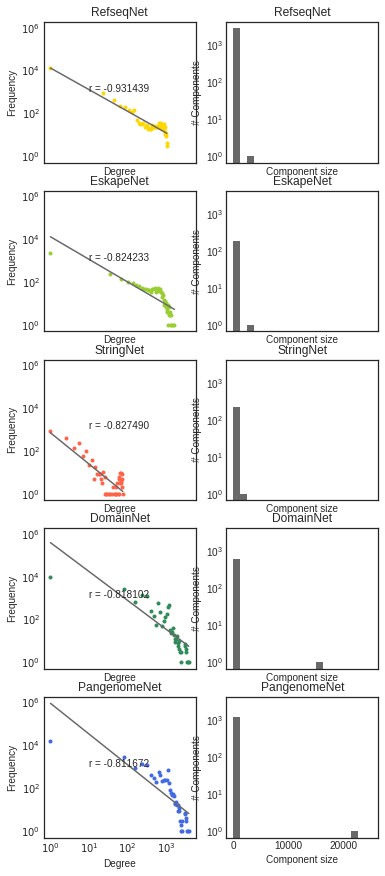

In [31]:
# plot powerlaw and Number of components
fig, axes = plt.subplots(nrows = 5, ncols = 2, sharex = 'col', sharey = 'col', figsize = (6, 15))

row = 0
names = ['RefseqNet', 'EskapeNet', 'StringNet','DomainNet', 'PangenomeNet']
colors = ['gold', 'yellowgreen', 'tomato', 'seagreen', 'royalblue']
for net, c in zip([refseq, eskape, string, domain, combined], colors):
    
    # power law
    from network_analysis.net_arch import *
    logx, logy, line, slope, r_value, p_value = power_law(net) # the most connected used to be 1970
    axes[row, 0].plot(logx, logy, '.', color = c)
    axes[row, 0].plot(logx, line, color = 'dimgrey')
    axes[row,0].text(1, 3,'r = '+ '{:f}'.format(r_value))
    
    axes[row,0].set_title(names[row])
    axes[row, 0].set_xlabel('Degree')
    axes[row, 0].set_xticks(list(range(4)))
    axes[row, 0].set_xticklabels(['$10^{}$'.format(i) for i in range(4)])
    axes[row, 0].set_yticks(list(range(0,8, 2)))
    axes[row, 0].set_yticklabels(['$10^{}$'.format(i) for i in range(0,8,2)])
    axes[row, 0].set_ylabel('Frequency')
    
    # subcomponent
    graphs = nx.connected_components(net)
    node_no = [len(g) for g in graphs]

    axes[row,1].hist(node_no, bins = 20, log = True, range = (0,25000), color = 'dimgrey')
    axes[row,1].set_xlabel('Component size')
    axes[row,1].set_ylabel('# Components')
    axes[row,1].set_title(names[row])
    
    
    # next net
    row += 1

    
    
    
plt.savefig('/home/hermuba/data0118/fig/fig_5_component_size_powerlaw.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')
    
    


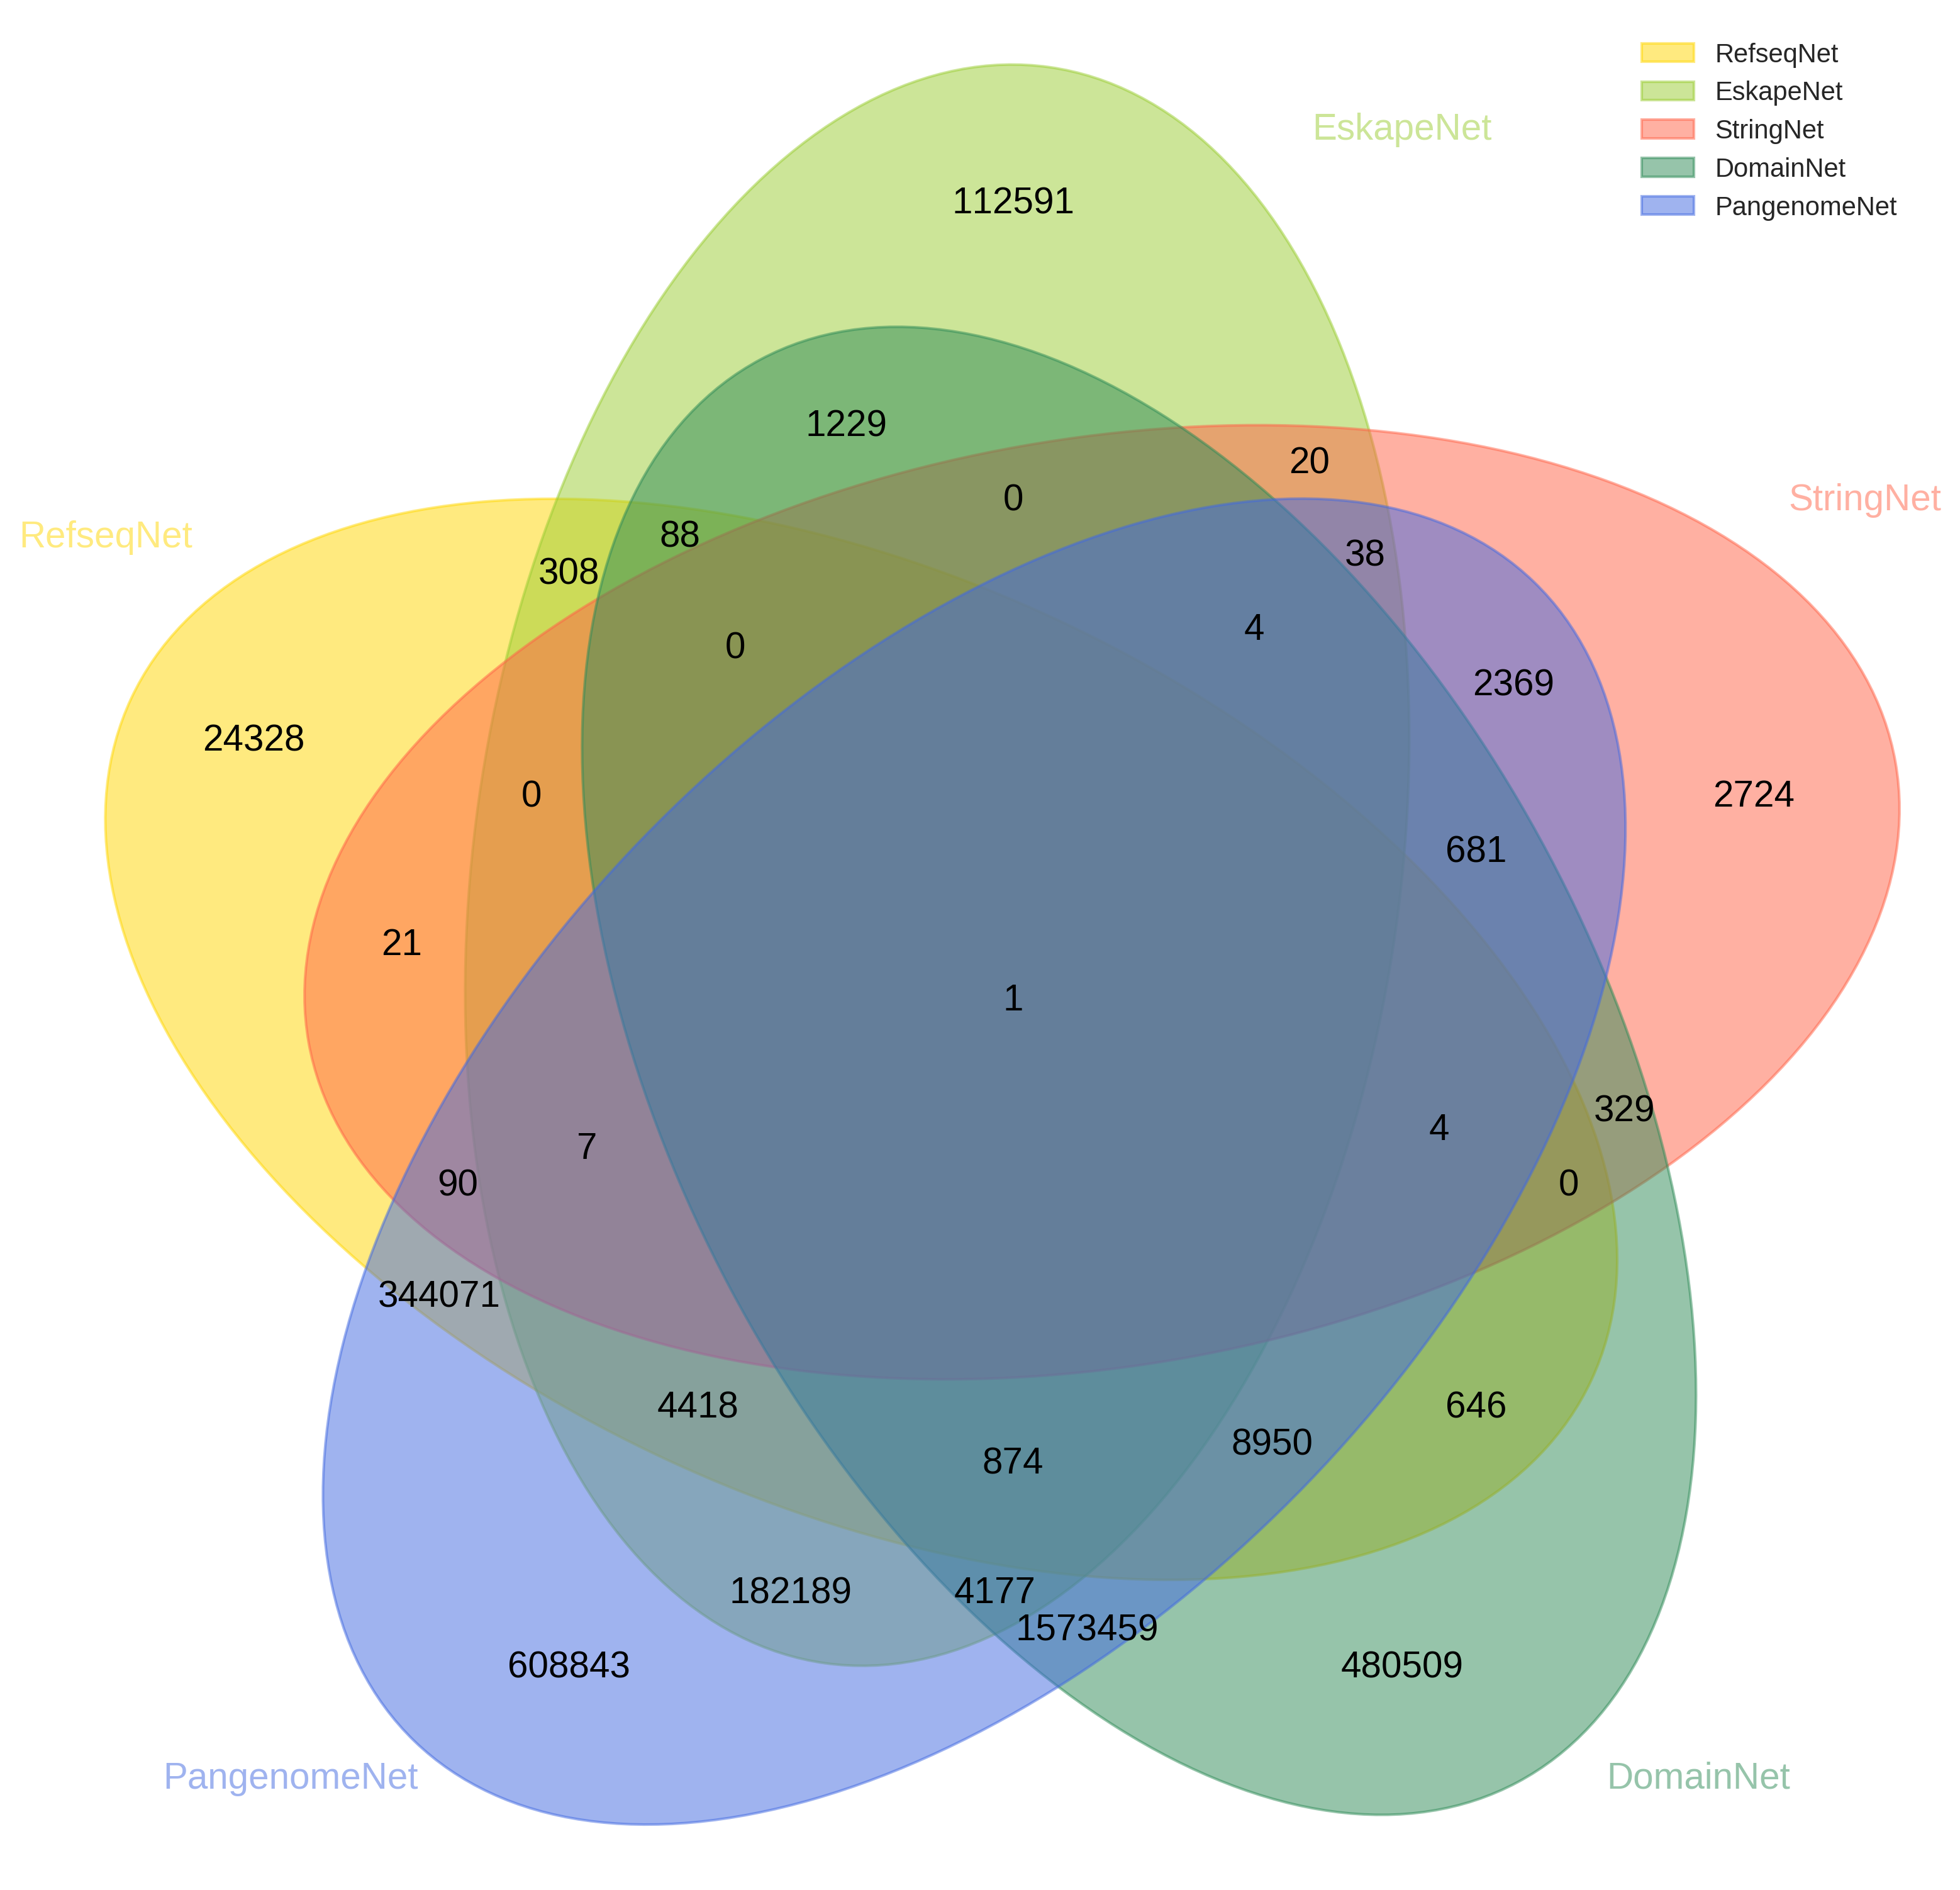

In [38]:
# edge relation

import sys

sys.path.append('/home/hermuba/pyvenn')
import venn

colors = [mpl.colors.to_rgba(c, alpha = 0.5) for c in ['gold', 'yellowgreen', 'tomato', 'seagreen', 'royalblue']]

labels = venn.get_labels([refseq.edges(), eskape.edges(), string.edges(), domain.edges(), combined.edges()], fill=['number'])
fig, ax = venn.venn5(labels, names=['RefseqNet', 'EskapeNet', 'StringNet', 'DomainNet', 'PangenomeNet'], colors = colors, dpi = 300)

plt.savefig('/home/hermuba/data0118/fig/edge_venn5.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')
fig.show()
#plt.close('all')



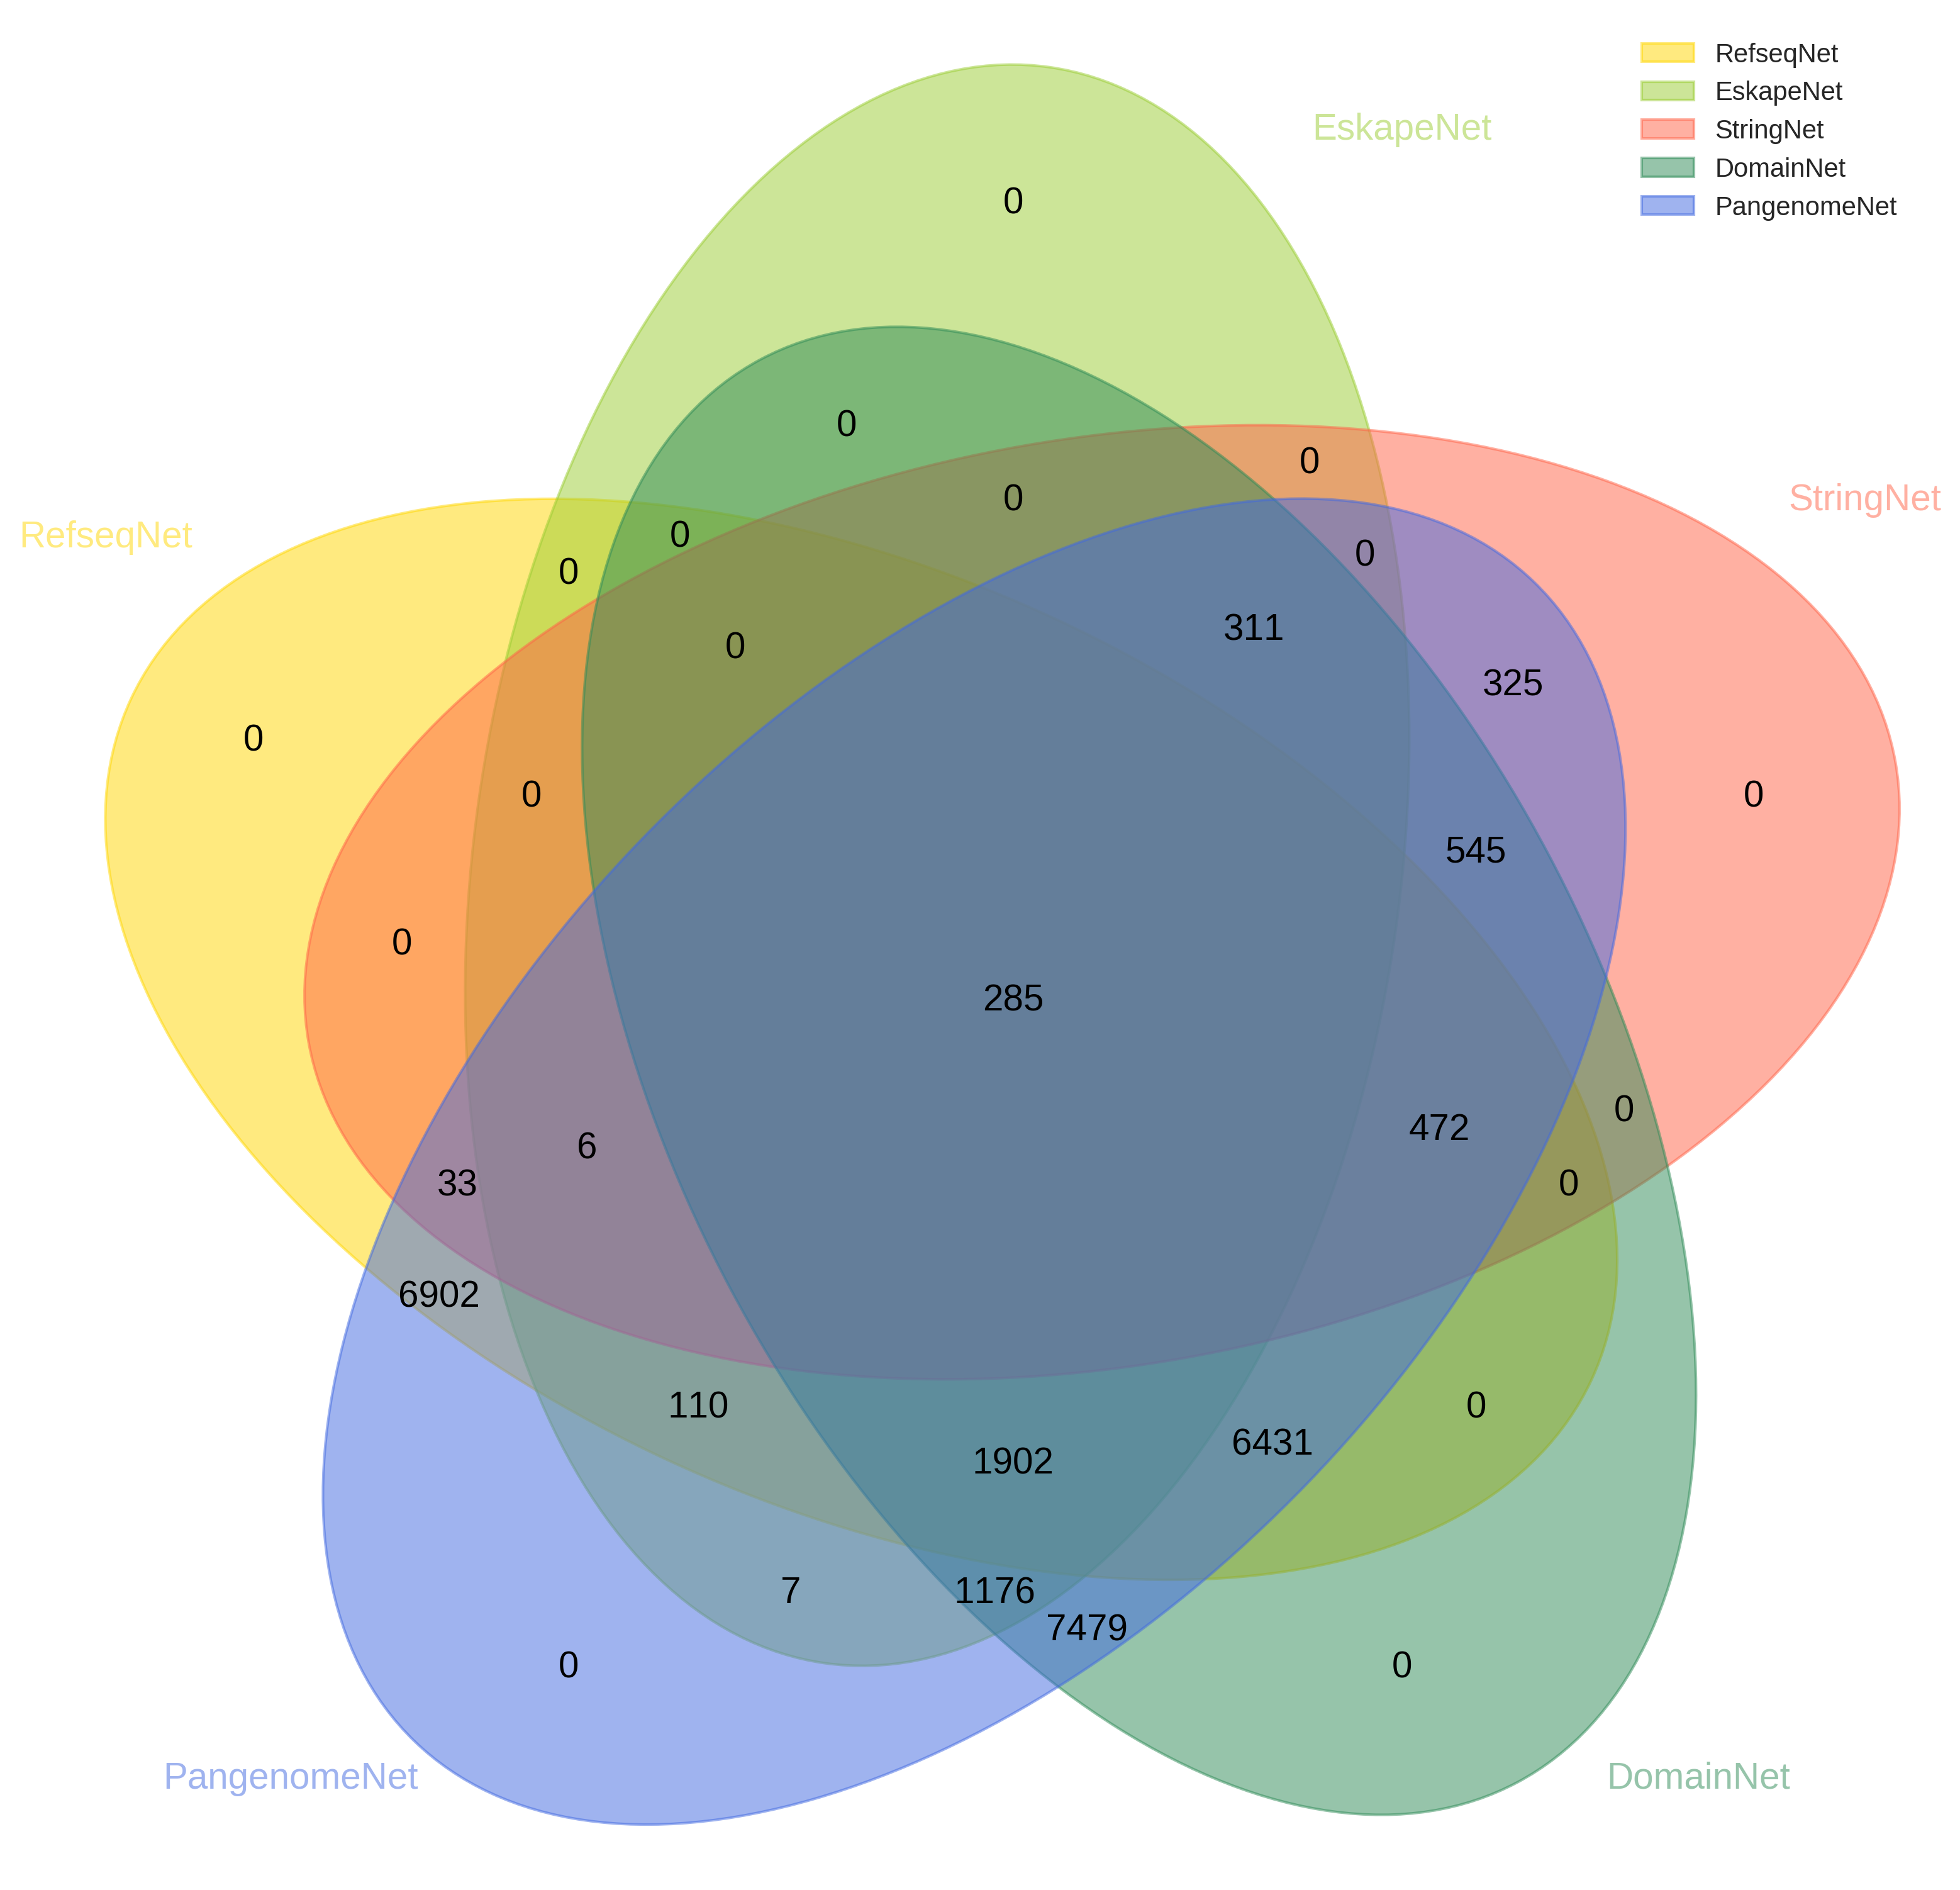

In [34]:
# edge relation
colors = [mpl.colors.to_rgba(c, alpha = 0.5) for c in ['gold', 'yellowgreen', 'tomato', 'seagreen', 'royalblue']]

labels = venn.get_labels([refseq.nodes(), eskape.nodes(), string.nodes(), domain.nodes(), combined.nodes()], fill=['number'])
fig, ax = venn.venn5(labels, names=['RefseqNet', 'EskapeNet', 'StringNet', 'DomainNet', 'PangenomeNet'], colors = colors, dpi = 300)

plt.savefig('/home/hermuba/data0118/fig/node_venn5.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')
fig.show()



In [39]:
# show how many nodes each network contribute
names = ['EskapeNet', 'RefseqNet', 'StringNet', 'DomainNet']
node_contribution = pd.DataFrame(index = combined.nodes(), columns = names)
for net, name in zip([eskape, refseq, string, domain], names):
    node_contribution.loc[list(net.nodes), name] = True
node_contribution.fillna(False, inplace =True)

In [43]:
unique_genes

Index(['JMUY01000005_251|1438670.3', 'JMUY01000006_508|1438670.3',
       'CP020058_4239|562.16325', 'MPCO01000001_3879|562.12960',
       'JMUY01000002_231|1438670.3', 'JMUY01000001_1424|1438670.3',
       'JMUY01000002_467|1438670.3', 'JMUY01000001_1476|1438670.3',
       'JMUY01000005_211|1438670.3', 'JMUY01000002_522|1438670.3',
       ...
       'JMUY01000001_1606|1438670.3', 'JMUY01000002_109|1438670.3',
       'JMUY01000002_196|1438670.3', 'JMUY01000002_560|1438670.3',
       'JMUY01000002_379|1438670.3', 'JMUY01000002_414|1438670.3',
       'JMUY01000002_417|1438670.3', 'JMUY01000004_289|1438670.3',
       'JMUY01000004_406|1438670.3', 'JMUY01000004_408|1438670.3'],
      dtype='object', length=325)

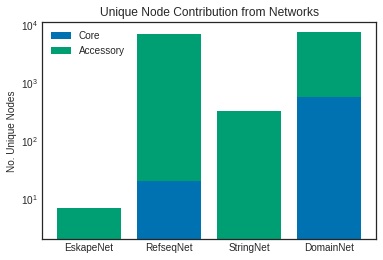

<Figure size 432x288 with 0 Axes>

In [44]:
# find net-unique nodes and label them as acc or core
acc = []
core = []
for name in names:
    unique_genes = node_contribution.loc[(node_contribution.sum(axis = 1) == 1) & (node_contribution[name])].index
    no_core = gold_anno.loc[list(set(unique_genes).intersection(set(gold_anno.index))), 'core'].sum()
    no_acc = len(unique_genes) - no_core

    acc.append(no_acc)
    core.append(no_core)

# plot it
ind = np.arange(len(acc))

p1 = plt.bar(ind, core)
p2 = plt.bar(ind, acc,
             bottom=core)

plt.ylabel('No. Unique Nodes')
plt.title('Unique Node Contribution from Networks')
plt.xticks(ind, names)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Core', 'Accessory'))
plt.yscale('log')
plt.show()
plt.savefig('/home/hermuba/data0118/fig/Unique_node.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')
    

In [45]:
# calculate centrality of each nodes
dc = nx.algorithms.centrality.degree_centrality(combined)
for k in dc.keys():
    gold_anno.loc[k ,'degree_centrality']  = dc[k]

In [46]:
# split cog into 0101

split_cog = gold_anno.loc[gold_anno['cog_category'].notnull()]['cog_category'].apply(list)
cog_df = pd.DataFrame(columns = ['J','A','K','L','B','D','Y','V','T','M','N','Z','W','U','O','C','G','E','F','H','I','P','Q','R','S','no COG'], index = gold_anno.index)

# make into 0101 table
for i in split_cog.index:
    cog_lists = split_cog[i]
    for each_category in cog_lists:
        cog_df.loc[i, each_category] = True

# find those without COG
cog_df.loc[gold_anno.loc[gold_anno['cog_category'].isnull()].index, 'no COG'] = True
cog_df.fillna(False, inplace = True)

In [62]:
[len(s) for s in seq_of_cen]

[0,
 0,
 19273,
 1616,
 49,
 205,
 1277,
 180,
 622,
 398,
 533,
 680,
 919,
 408,
 298,
 801,
 141,
 1488,
 3,
 403,
 1473,
 231,
 1153,
 243,
 1,
 124]

In [97]:
labels[0]=='no COG'

True

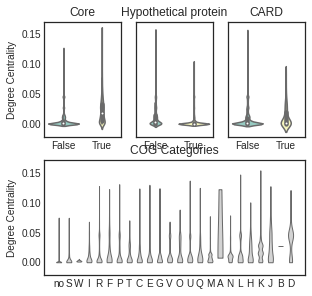

In [100]:
# pangenome property
import seaborn as sns
fig, ax = plt.subplots(2,3, sharey = True, figsize = (4.67, 4.66))
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan = 1)
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((2, 3), (0, 2), colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=3, sharey = ax1)


axes = [ax1, ax2, ax3, ax4]

#gold_anno.boxplot(by = 'core', column = 'degree_centrality', ax = ax1)
sns.violinplot(data = gold_anno, x = 'core', y = 'degree_centrality', ax = ax1, palette="Set3")
#plt.sca(ax1)
ax1.set_title('Core')
ax1.set_ylabel('Degree Centrality')

gold_anno['hypo_nr'] = gold_anno['hypo_nr'].fillna(False)
sns.violinplot(data = gold_anno, x = 'hypo_nr', y = 'degree_centrality', ax = ax2, palette="Set3")
ax2.set_title('Hypothetical protein')
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_ylabel('')
# COG category
seq_of_cen = []
for cog in cog_df.columns:
    subset_df =gold_anno.loc[cog_df.loc[cog_df[cog]].index,'degree_centrality'].fillna(0)
    
    if len(subset_df)==0:
        pass
    else:
        seq_of_cen.append([subset_df.values, subset_df.median(), cog]) # values, median, cog

sorted_by_medium = sorted(seq_of_cen, key=lambda tup: tup[1])
values = [s[0] for s in sorted_by_medium]
labels = [s[2] for s in sorted_by_medium]



parts= ax4.violinplot(values, showmeans=False, showmedians=False,showextrema=False)
for pc in parts['bodies']: # custom style
    pc.set_facecolor('lightgrey')
    pc.set_edgecolor('dimgrey')
    pc.set_alpha(1)
ax4.set_xticks(list(range(1,len(labels)+1)))

labels = ['no' if l == 'no COG' else l for l in labels]
ax4.set_xticklabels(labels)
ax4.set_title('COG Categories')
ax4.set_ylabel('Degree Centrality')



sns.violinplot(data = gold_anno, x = 'is_card', y = 'degree_centrality', ax = ax3, palette="Set3")

ax3.set_title('CARD')
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_ylabel('')

_ = [axes[i].set_xlabel("") for i in range(4)]
#_ = [axes[i].set_ylabel('degree centrality') for i in range(4)]


#fig.tight_layout()
plt.suptitle("")
plt.savefig('/home/hermuba/data0118/fig/fig_6_centrality.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')

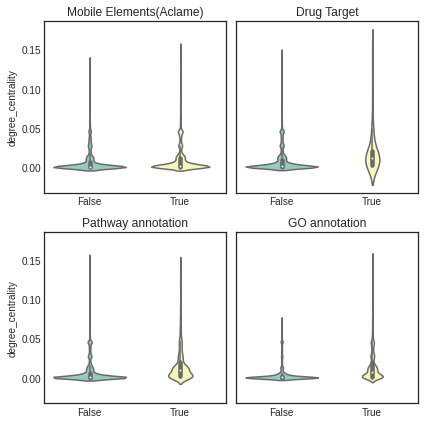

In [90]:
fig, ax = plt.subplots(2,2, figsize = (6,6), sharey = True)
ax = ax.flatten()
sns.violinplot(data = gold_anno, x = 'is_aclame', y = 'degree_centrality', ax = ax[0], palette="Set3")
ax[0].set_title('Mobile Elements(Aclame)')

sns.violinplot(data = gold_anno, x = 'is_drug_target', y = 'degree_centrality', ax = ax[1], palette="Set3")
ax[1].set_title('Drug Target')

# with pathway annotation
gold_anno['is_path'] = gold_anno['pathway'].notnull()
sns.violinplot(data = gold_anno, x = 'is_path', y = 'degree_centrality', ax = ax[2], palette="Set3")
ax[2].set_title('Pathway annotation')

# with GO annotation

gold_anno['is_go'] = gold_anno['GO'].notnull()
sns.violinplot(data = gold_anno, x = 'is_go', y = 'degree_centrality', ax = ax[3], palette="Set3")

ax[3].set_title('GO annotation')
_ = [ax[i].set_xlabel("") for i in range(4)]
_ = [ax[i].set_ylabel("") for i in [1,3]]

fig.tight_layout()
plt.suptitle("")
plt.savefig('/home/hermuba/data0118/fig/fig_6_sup_centrality.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')

In [ ]:
gold_anno.to_csv('~/data0118/network1122/ec_rmplasmid_node_anno-2.csv')

In [ ]:

cog_df.to_csv('~/data0118/goldstandard/cog_df.csv')

In [ ]:
# extract subnetwork for visualization
deg = combined.degree()
d = [node for node in deg.keys() if deg[node] > 30]
sub = combined.subgraph(d)
nx.write_edgelist(sub,'/home/hermuba/data0118/network1122/sub_edge')

In [ ]:
nx.write_edgelist(sub,'/home/hermuba/data0118/network1122/sub_edge')